In [ ]:
# Data preprocessing for House price Prediction dataset
#SETPS
#1. Import libraray
#2. Read Dataset
#3. Sanity data check
#4. Exploratory Data Analysis
#5. Missing Value treatments
#6. Outliers treatments
#7. Duplicates and garbage value treatments
#8. normalization
#9. Encoding of data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from  Univariate import Univariate
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [25]:
dataset = pd.read_csv("datapreprocessing_hrp.csv")
#dataset = pd.read_csv("kidney_disease.csv")


In [26]:
dataset.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0.0,0,3.0,1340,0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0.0,4,5.0,3370,280,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0.0,0,4.0,1930,0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0.0,0,4.0,1000,1000,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,NaN,0,4.0,1140,800,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [27]:
dataset.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4595,2014-07-09 00:00:00,308166.666667,3.0,1.75,1510,6360,1.0,0.0,0,4.0,1510,0,1954.0,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,534333.333333,3.0,2.50,1460,7573,2.0,0.0,0,3.0,1460,0,1983.0,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,416904.166667,3.0,2.50,3010,7014,2.0,0.0,0,3.0,3010,0,2009.0,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,203400.000000,4.0,2.00,2090,6630,1.0,0.0,0,3.0,1070,1020,1974.0,0,5148 S Creston St,Seattle,WA 98178,USA
4599,2014-07-10 00:00:00,220600.000000,3.0,2.50,1490,8102,2.0,0.0,0,4.0,1490,0,1990.0,0,18717 SE 258th St,Covington,WA 98042,USA


In [28]:
dataset.shape

(4600, 18)

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4599 non-null   float64
 7   waterfront     4598 non-null   float64
 8   view           4600 non-null   int64  
 9   condition      4599 non-null   float64
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4599 non-null   float64
 13  yr_renovated   4600 non-null   object 
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4599 non-null   object 
dtypes: float

In [30]:
dataset.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           1
waterfront       2
view             0
condition        1
sqft_above       0
sqft_basement    0
yr_built         1
yr_renovated     0
street           0
city             0
statezip         0
country          1
dtype: int64

In [31]:
dataset.isnull().sum()/(dataset.shape[0]/100)
# if more than 50% we can delete those columns

date             0.000000
price            0.000000
bedrooms         0.000000
bathrooms        0.000000
sqft_living      0.000000
sqft_lot         0.000000
floors           0.021739
waterfront       0.043478
view             0.000000
condition        0.021739
sqft_above       0.000000
sqft_basement    0.000000
yr_built         0.021739
yr_renovated     0.000000
street           0.000000
city             0.000000
statezip         0.000000
country          0.021739
dtype: float64

In [32]:
#Duplicates
dataset.duplicated().sum()

np.int64(0)

In [33]:
#Garbage values finding
#Garbage values only present in object data type. 
#Need to change to mean/median or mode if it is garbage values
for col in dataset.select_dtypes(include="number").columns:
    print(col)
    print(dataset[col].value_counts())
    print("******")


price
price
0.000000         49
300000.000000    42
400000.000000    31
600000.000000    29
450000.000000    29
                 ..
691000.000000     1
282766.666667     1
406062.500000     1
473200.000000     1
454790.000000     1
Name: count, Length: 1741, dtype: int64
******
bedrooms
bedrooms
3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: count, dtype: int64
******
bathrooms
bathrooms
2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.00      23
4.25      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
0.00       2
6.25       2
5.75       1
8.00       1
6.50       1
6.75       1
Name: count, dtype: int64
******
sqft_living
sqft_living
1940    32
1720    32
1840    31
1660    31
2000    30
        ..
3710     1
490      1
2286     1
2961     1
5780     1
Name: count, L

In [34]:
#Exploratory Data Analysis(EDA) - descriptive statistics
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4599.0,1.511959,0.538299,1.0,1.00,1.500000,2.00,3.5
waterfront,4598.0,0.007177,0.084422,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4599.0,3.451837,0.677271,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [35]:
dataset.describe(include="object")

,date,yr_renovated,street,city,statezip,country
count,4600,4600,4600,4600,4600,4599
unique,70,61,4525,45,78,1
top,2014-06-23 00:00:00,0,2520 Mulberry Walk NE,Seattle,WA 98103,USA
freq,142,2734,4,1573,148,4599


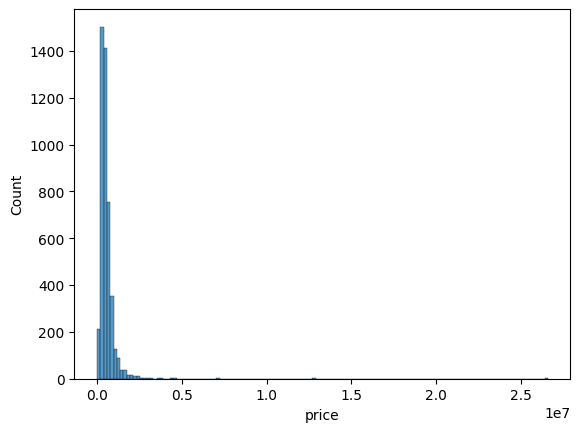

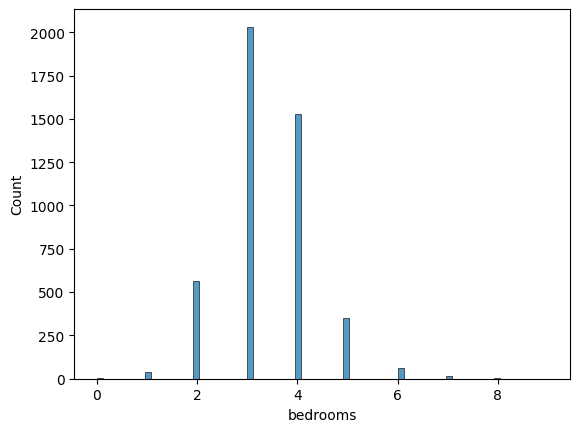

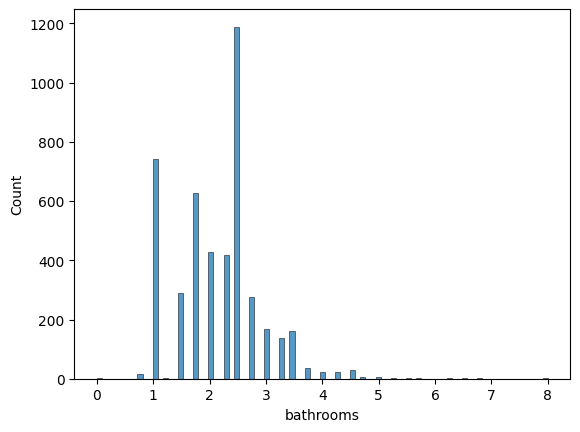

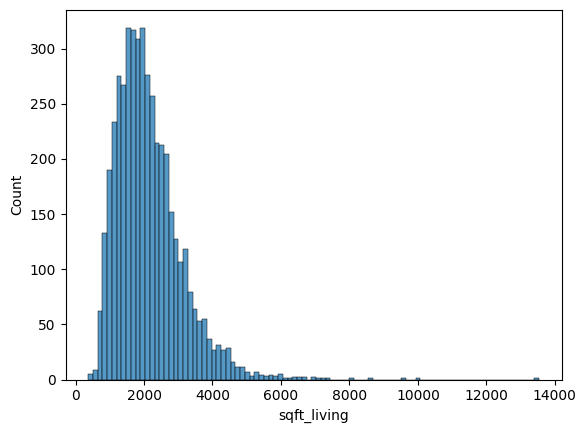

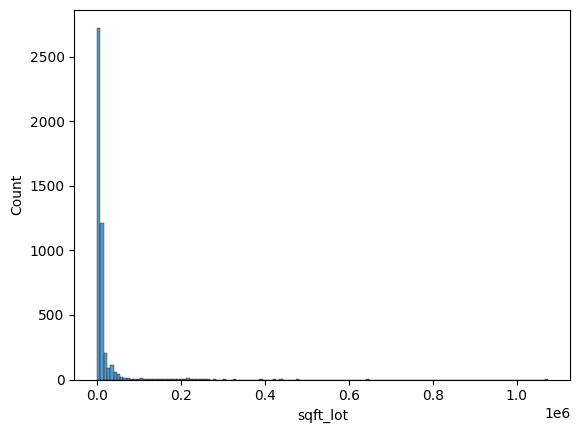

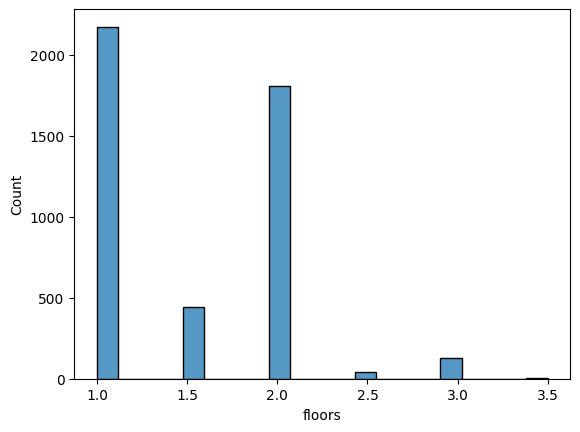

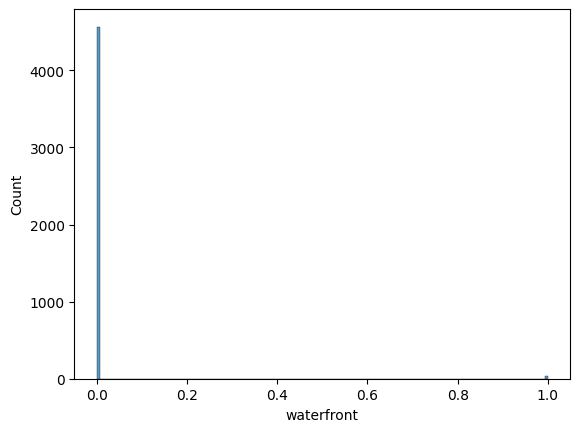

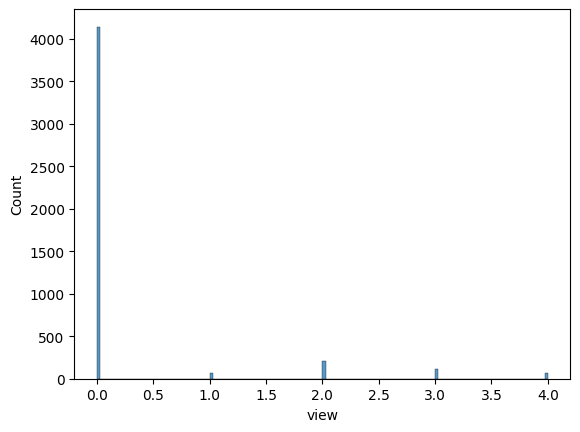

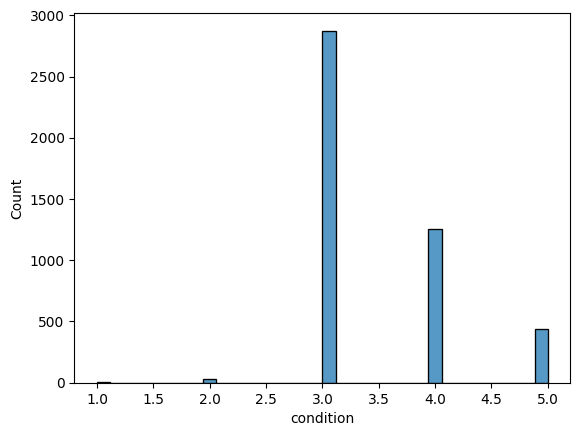

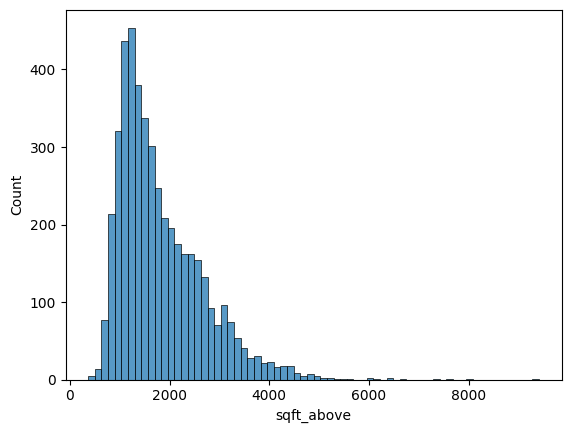

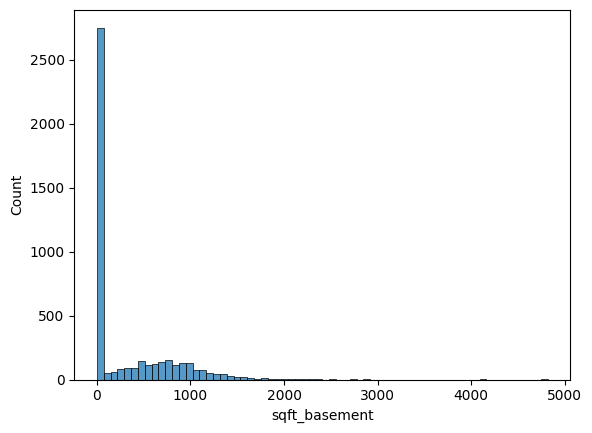

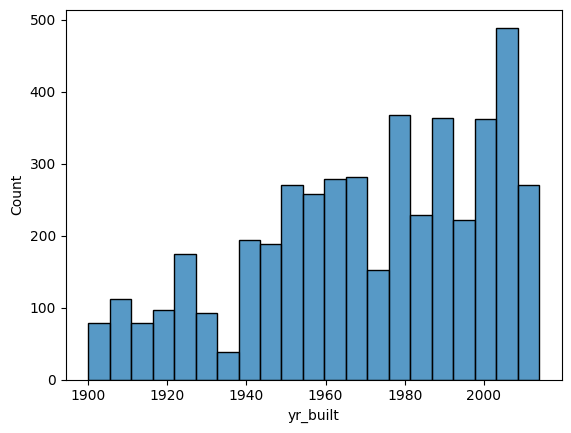

In [36]:
#Histogram to 
#print(dataset.select_dtypes(include="number").columns)
#print(dataset.select_dtypes(include="object").columns)

for col in dataset.select_dtypes(include="number").columns:
    sns.histplot(data=dataset, x=col)
    plt.show()

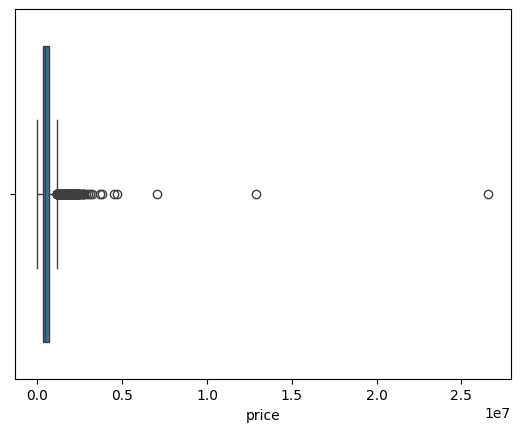

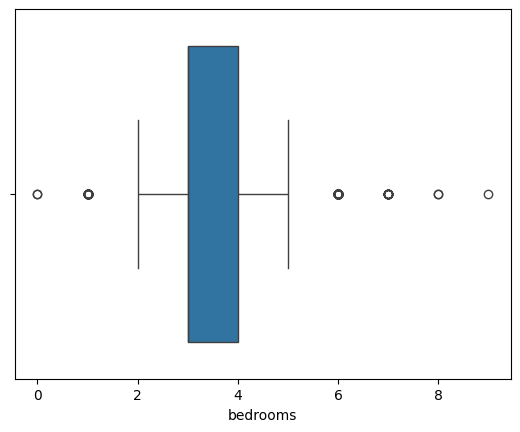

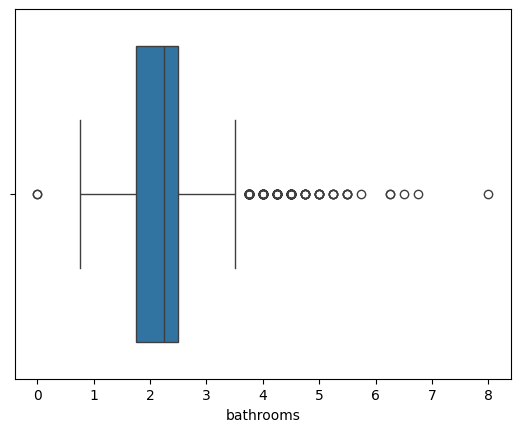

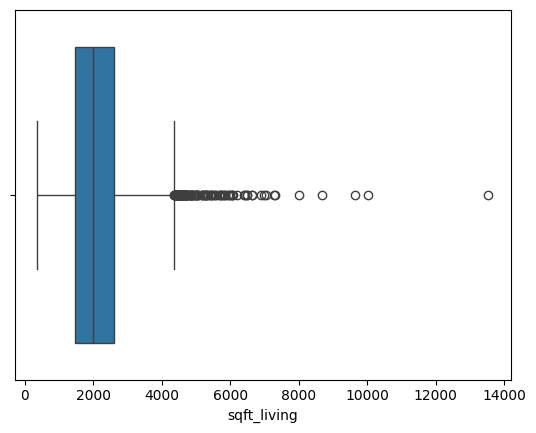

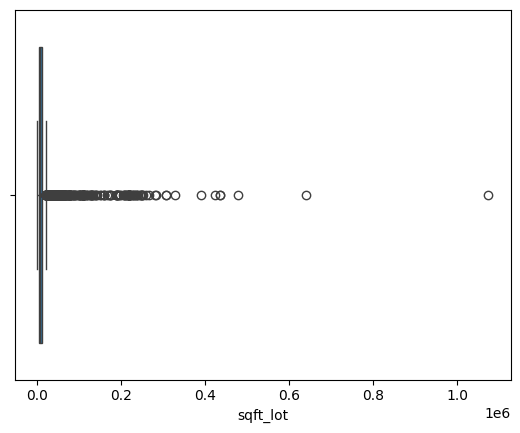

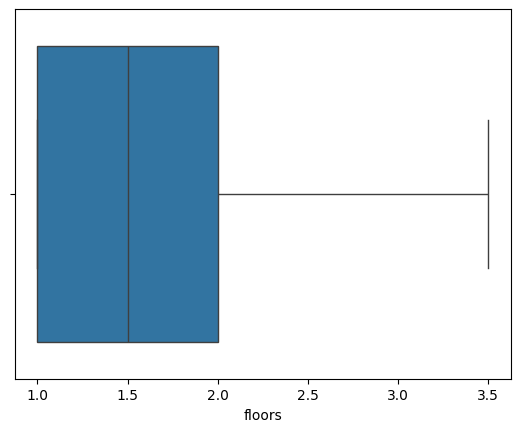

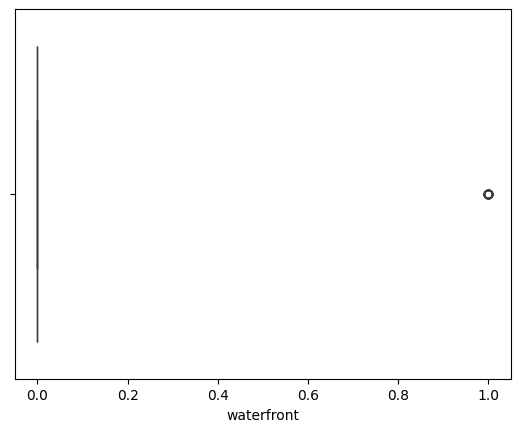

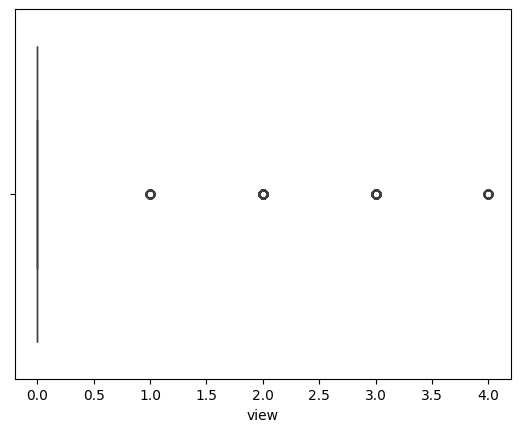

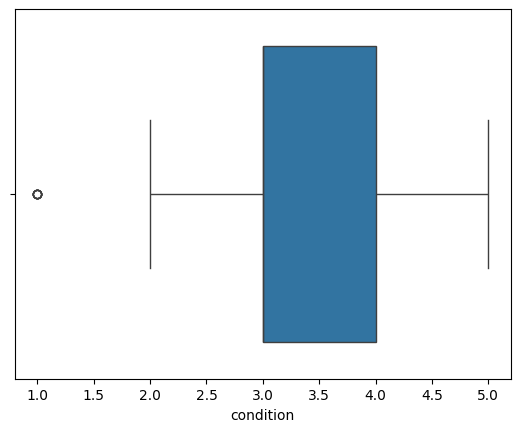

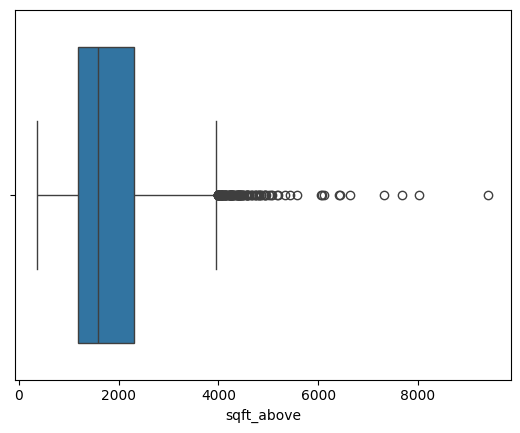

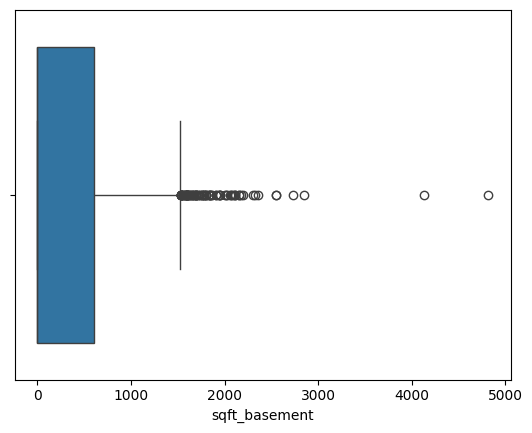

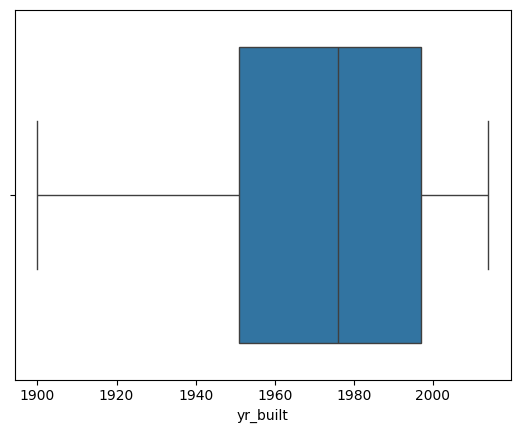

In [37]:
#Boxplt-to-identify outliers
for col in dataset.select_dtypes(include="number").columns:
    sns.boxplot(data=dataset, x=col)
    plt.show()

In [39]:
dataset.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

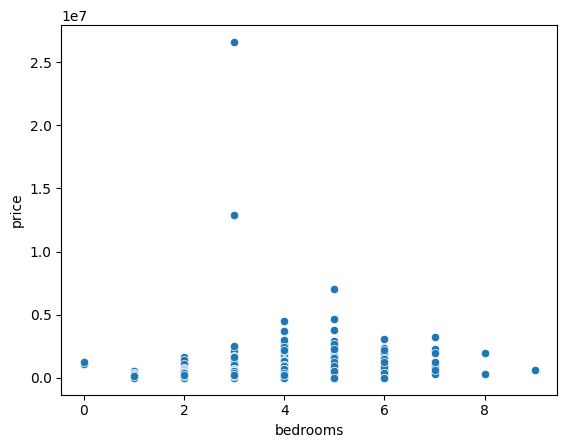

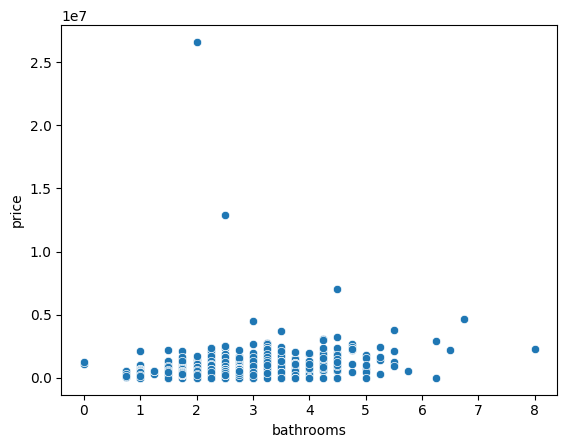

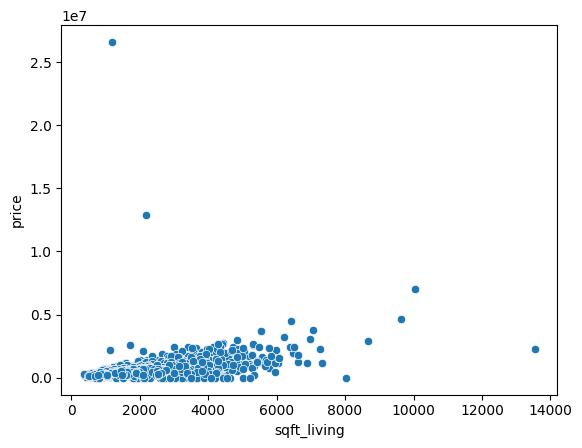

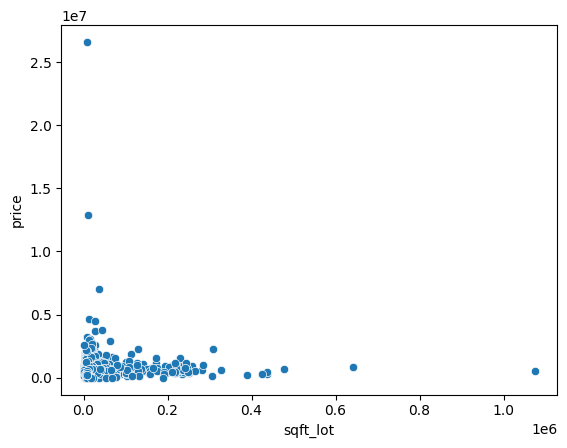

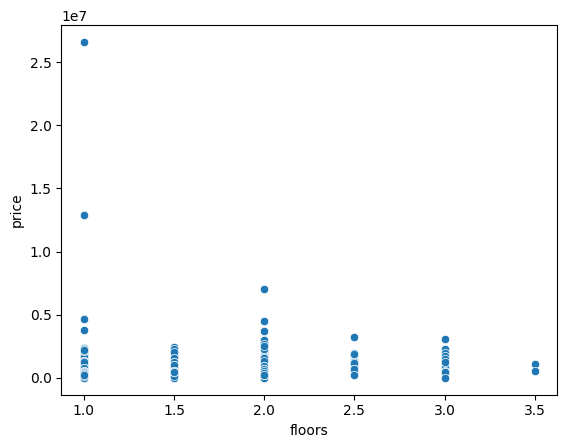

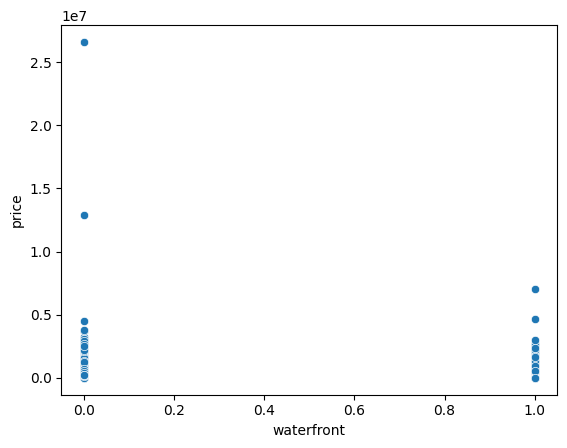

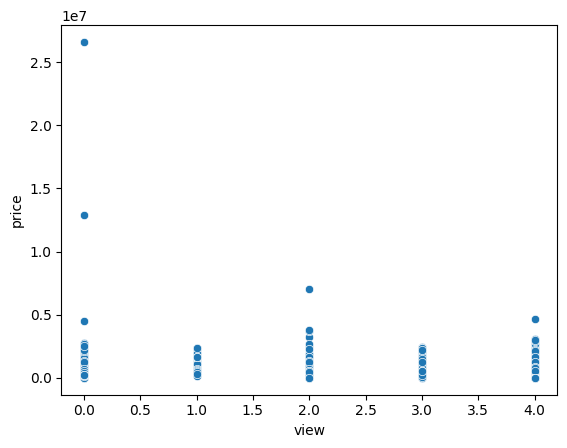

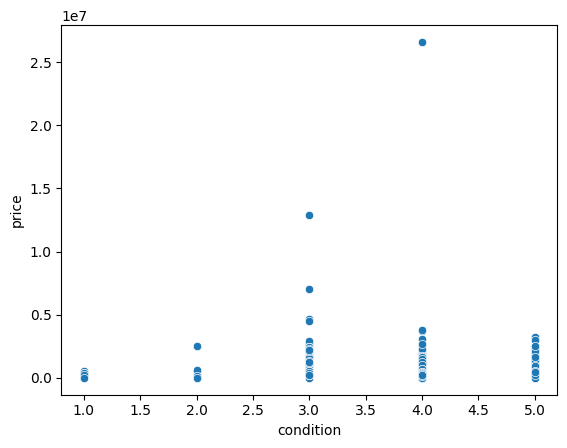

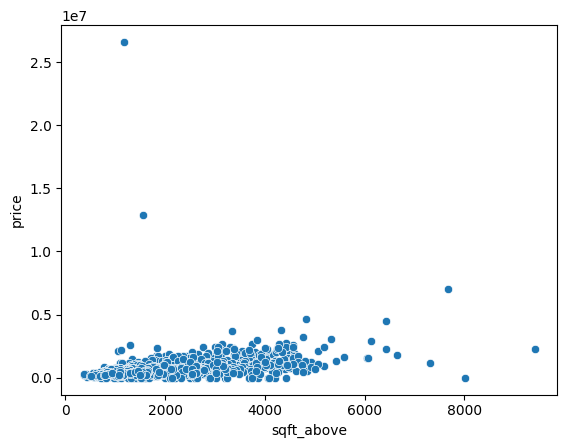

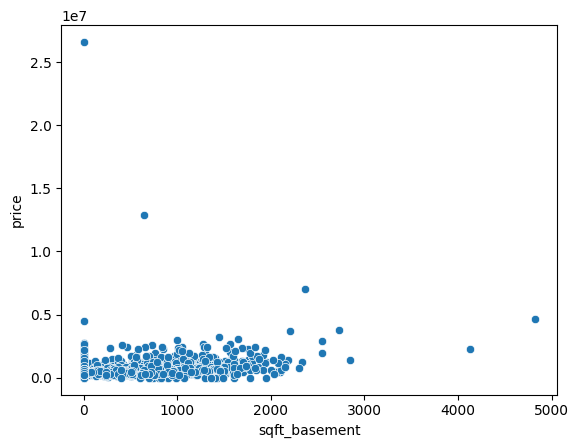

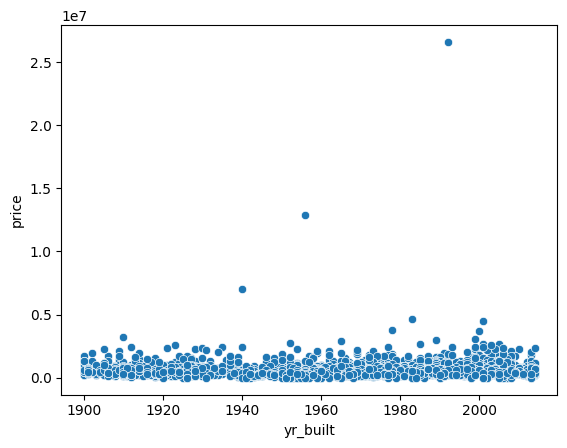

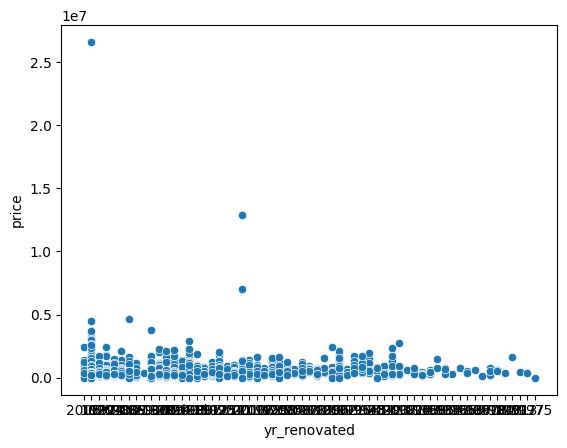

In [40]:
#Scatter plot to understand the relationship
for col in [ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated']:
       sns.scatterplot(data=dataset,x=col,y='price')
       plt.show()

In [41]:
#Correlation with heatmap
dataset.select_dtypes(include='number').corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151449,0.135648,0.228504,0.034935,0.367570,0.210427,0.021922
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177789,-0.003479,0.111028,0.025178,0.484705,0.334165,0.142353
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486353,0.076235,0.211960,-0.119940,0.689918,0.298020,0.463389
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344746,0.117636,0.311009,-0.062730,0.876443,0.447206,0.287638
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003795,0.017250,0.073907,0.000532,0.216455,0.034842,0.050752
floors,0.151449,0.177789,0.486353,0.344746,0.003795,1.000000,0.022027,0.031275,-0.274826,0.522702,-0.255413,0.467254
waterfront,0.135648,-0.003479,0.076235,0.117636,0.017250,0.022027,1.000000,0.360931,0.000343,0.078939,0.097525,-0.023541
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031275,0.360931,1.000000,0.063036,0.174327,0.321602,-0.064412
condition,0.034935,0.025178,-0.119940,-0.062730,0.000532,-0.274826,0.000343,0.063036,1.000000,-0.178064,0.200554,-0.399524
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522702,0.078939,0.174327,-0.178064,1.000000,-0.038723,0.408383


<Axes: >

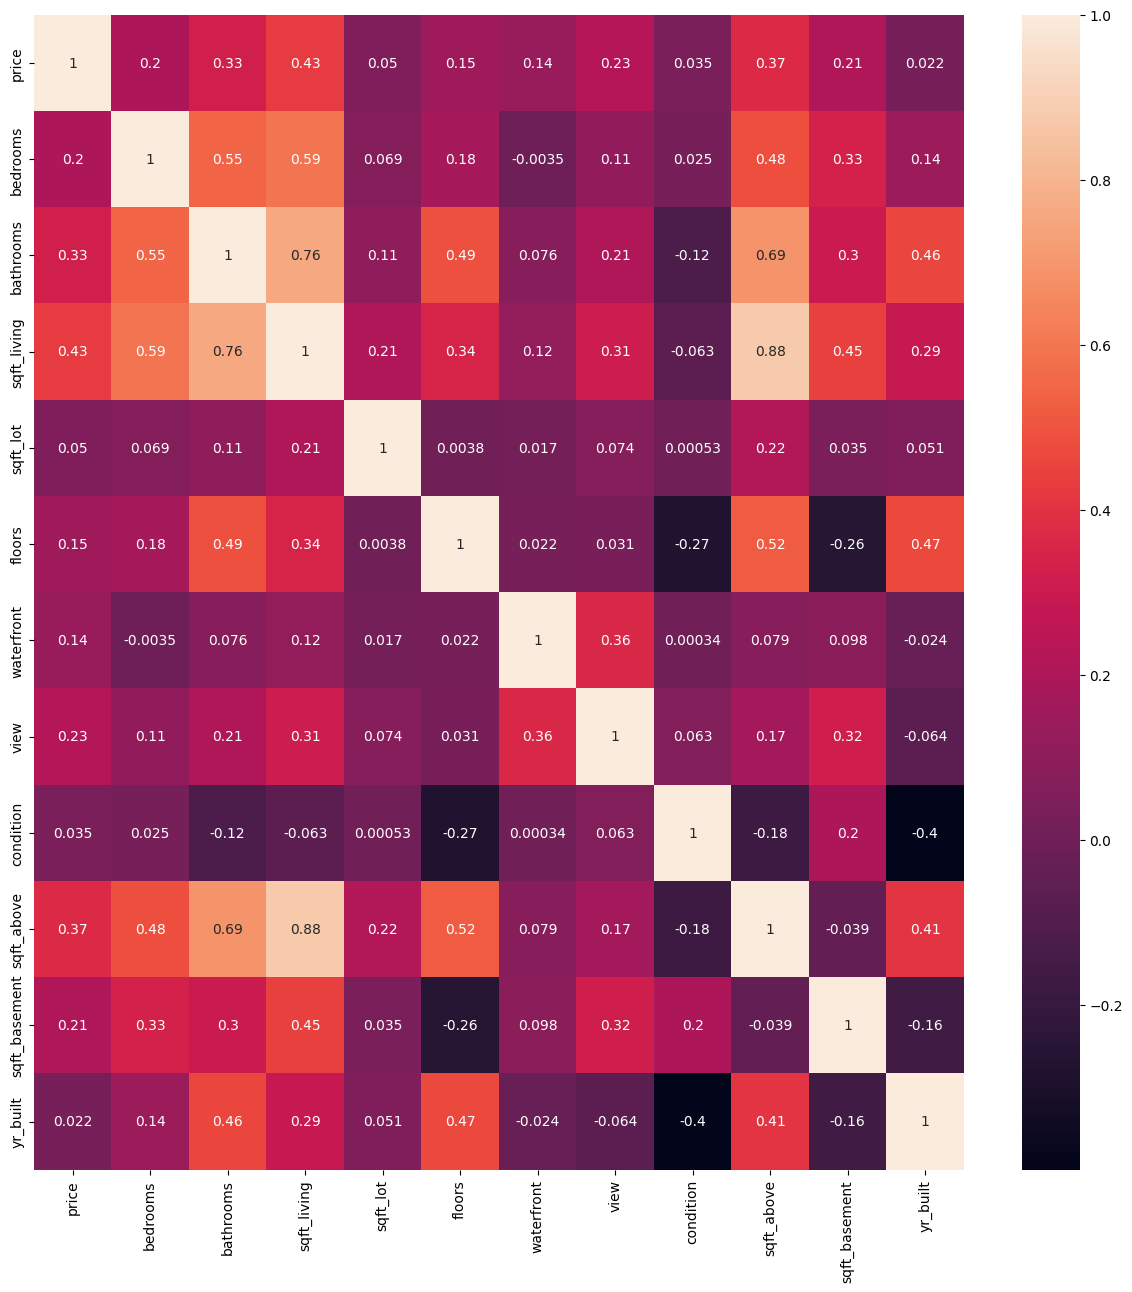

In [42]:
plt.figure(figsize=(15,15))
sns.heatmap(data=dataset.select_dtypes(include='number').corr(),annot=True)

In [43]:
# Missing value treatments
# choose the method of imputing missing value 
# continuous value cane be fill with median or mean
# for categorical and discrete data can be fill with mode
# No need to full if it's target varaible


dataset.isnull().sum()



date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           1
waterfront       2
view             0
condition        1
sqft_above       0
sqft_basement    0
yr_built         1
yr_renovated     0
street           0
city             0
statezip         0
country          1
dtype: int64

In [44]:
for col in ["yr_built", "condition", "waterfront","floors"]:
    dataset[col].fillna(dataset[col].median(), inplace=True)


In [45]:
#it's take the nearest average value 
from sklearn.impute import KNNImputer
impute = KNNImputer()
for col in dataset.select_dtypes(include="number").columns:
    dataset[col]= impute.fit_transform(dataset[[col]])


In [46]:
dataset.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          1
dtype: int64

In [51]:
def wisker(col):
    q1,q3=np.percentile(col,[25,75])
    iqr=q3-q1
    lw=q1-1.5*iqr
    uw = q3+1.5*iqr
    return lw,uw

In [52]:
#Outliers treatments
# only do for continupus number not for target and categorical 
wisker(dataset["sqft_lot"])


(np.float64(-4000.0), np.float64(20002.0))

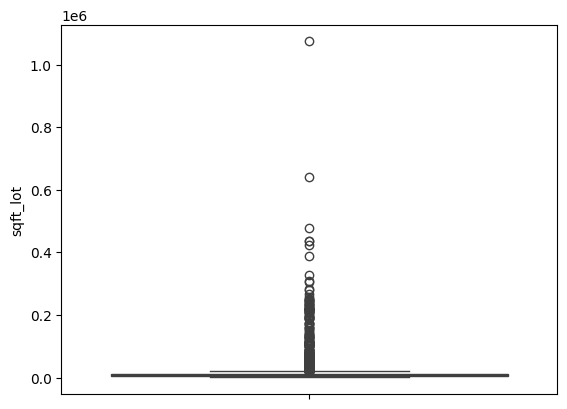

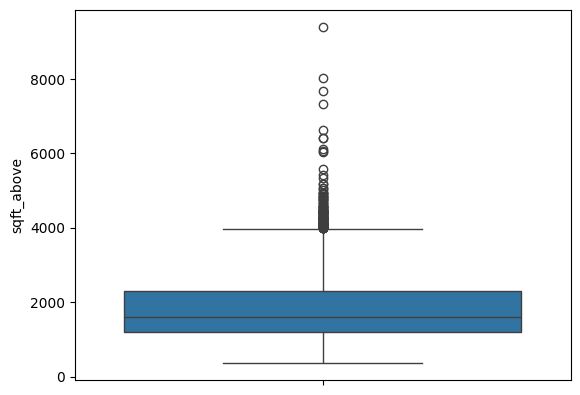

In [53]:
#Before outliers
for col in ["sqft_lot","sqft_above"]:
    sns.boxplot(dataset[col])
    plt.show()

In [54]:
for col in ["sqft_lot","sqft_above"]:
    lw, uw =wisker(dataset[col])
    dataset[col] = np.where(dataset[col]<lw, lw, dataset[col])
    dataset[col] = np.where(dataset[col]>uw, uw, dataset[col])

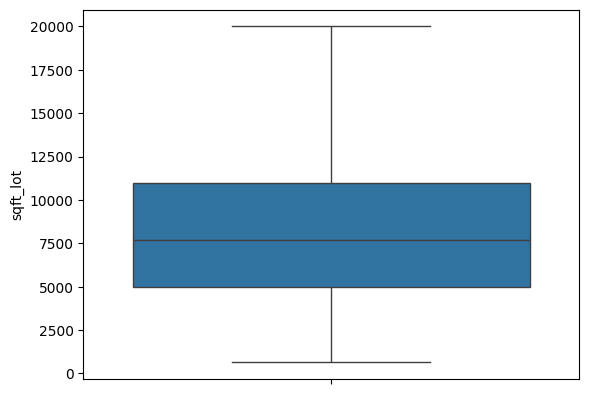

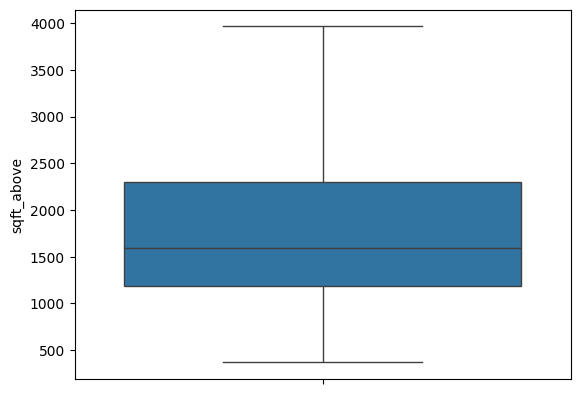

In [55]:
#After Outliers
for col in ["sqft_lot","sqft_above"]:
    sns.boxplot(dataset[col])
    plt.show()

In [64]:
#Drop duplicates
dataset.drop_duplicates()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340.0,7912.0,1.5,0.0,0.0,3.0,1340.0,0.0,1955.0,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650.0,9050.0,2.0,0.0,4.0,5.0,3370.0,280.0,1921.0,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930.0,11947.0,1.0,0.0,0.0,4.0,1930.0,0.0,1966.0,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000.0,8030.0,1.0,0.0,0.0,4.0,1000.0,1000.0,1963.0,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940.0,10500.0,1.0,0.0,0.0,4.0,1140.0,800.0,1976.0,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510.0,6360.0,1.0,0.0,0.0,4.0,1510.0,0.0,1954.0,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460.0,7573.0,2.0,0.0,0.0,3.0,1460.0,0.0,1983.0,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010.0,7014.0,2.0,0.0,0.0,3.0,3010.0,0.0,2009.0,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090.0,6630.0,1.0,0.0,0.0,3.0,1070.0,1020.0,1974.0,0,5148 S Creston St,Seattle,WA 98178,USA


In [56]:
df = pd.DataFrame(dt)

In [65]:
#Imputer in python
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
for col in dataset.select_dtypes(include="number").columns:
    dataset[col]= imp.fit_transform(dataset[[col]])



In [ ]:
# 1. Replace the missing value witj central tendency : Mean, Median, Mode
# 2. Entire row delete
# 3. Respective to the problem statement replace the missing values
# 4. Consider this as a semi supervised, create a model, so that we can predict the missing values.
# Hot to handle categorical data -> through Mode

In [6]:
dataset.dropna(inplace=True)

In [7]:
dataset['price'].fillna(0,inplace=True)

C:\Users\20813473\AppData\Local\Temp\ipykernel_30236\3283832651.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['price'].fillna(0,inplace=True)
